In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

In [2]:
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['axes.linewidth'] = 0

font = {'family' : 'Arial',
        'weight' : 'ultralight',
        'size'   : 18}

plt.rc('font', **font)

plt.rc('ytick.major', size=0)
plt.rc('xtick.major', size=0)
plt.rc('ytick.major', width=0)
plt.rc('xtick.major', width=0)
plt.rc('lines', linewidth=2)

In [3]:
ssa=xr.open_mfdataset('../data/sea-surface-anomaly-2020/*.nc')

In [71]:
ssa=ssa.sel(latitude=slice(-65, -35), longitude=slice(-50, 50))

In [5]:
ssa['gos'] = (('time', 'latitude', 'longitude'), np.sqrt(ssa.ugos**2+ssa.vgos**2).data)

In [72]:
ssa=ssa.load()

In [70]:
# etopo = xr.open_dataset('/Users/marcel/Google Drive/Projects/polar-gliders-operations/data/ETOPO1_Bed_g_gmt4.grd')
etopo=etopo.sel(y=slice(-65, -35), x=slice(-50, 50))
etopo=etopo.load()

In [76]:
Z = etopo.z.values
X, Y = np.meshgrid(etopo.x.values, etopo.y.values)

Z[Z>-10]=-10

In [80]:
skip=1

x, y, z = np.meshgrid(ssa.longitude[::skip], 
                      ssa.latitude[::skip], 
                      0)

u = np.expand_dims(ssa.ugos.isel(time=0)[::skip, ::skip], axis=2)
v = np.expand_dims(ssa.vgos.isel(time=0)[::skip, ::skip], axis=2)
w = np.zeros(np.shape(z))

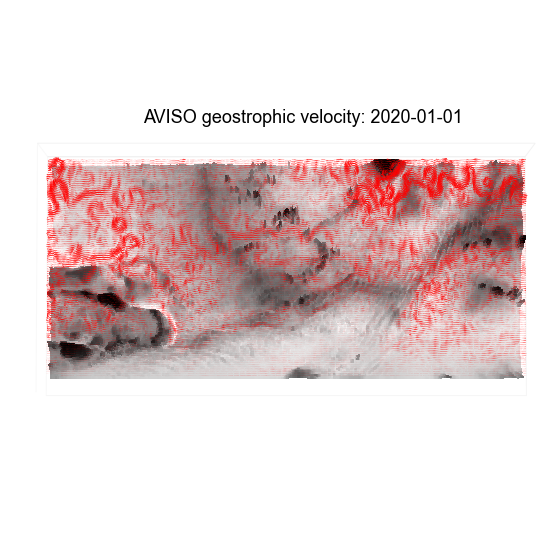

In [96]:
fig=plt.figure(figsize=[15,10])
ax = plt.axes(projection='3d')

ax.xaxis._axinfo["grid"].update({"linewidth":0})
ax.yaxis._axinfo["grid"].update({"linewidth":0})
ax.zaxis._axinfo["grid"].update({"linewidth":0})

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_box_aspect(aspect = (2,1,0.5))

ax.set_zlim(-8000, 0)
ax.set_xlim(-50, 50)

ax.zaxis.set_ticks([])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

ax.text(-30, -30, 0, 'AVISO geostrophic velocity: '+str(ssa.isel(time=0).time.values)[:10])

ax.plot_surface(X, Y, Z, rcount=ssa.latitude.size, ccount=ssa.longitude.size,
                cmap='gray_r', zorder=0, vmin=-6000, vmax=0, antialiased=False)

q=ax.quiver(x, y, z, u, v, w, length=0.5, arrow_length_ratio=0.1, linewidths=0.75, colors='r', zorder=100)

angle=-90
ax.view_init(86, angle)




 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 9/10 [04:16<00:28, 28.47s/it]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 365/366 [1:30:40<00:16, 16.40s/it]

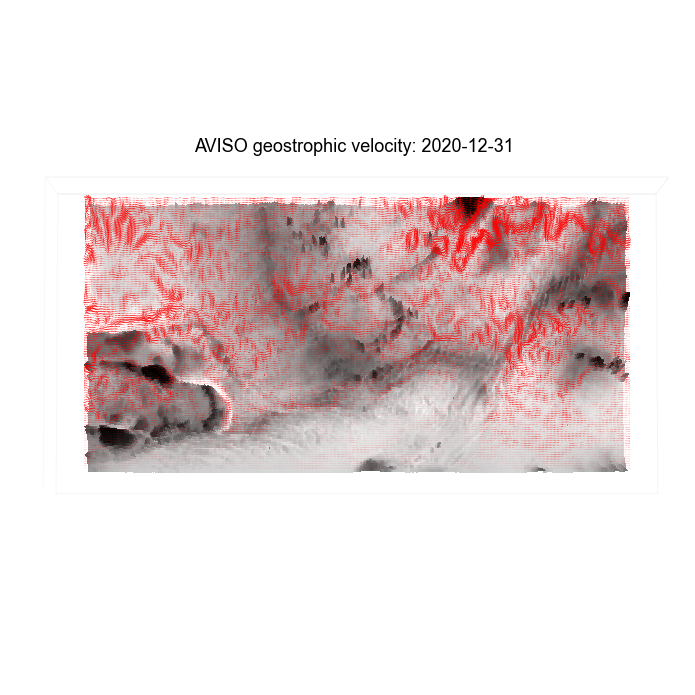

In [98]:
fig=plt.figure(figsize=[15,10])
ax = plt.axes(projection='3d')

ax.xaxis._axinfo["grid"].update({"linewidth":0})
ax.yaxis._axinfo["grid"].update({"linewidth":0})
ax.zaxis._axinfo["grid"].update({"linewidth":0})

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_box_aspect(aspect = (2,1,0.5))

ax.set_zlim(-8000, 0)
ax.set_xlim(-50, 50)

ax.zaxis.set_ticks([])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

ax.text(-30, -30, 0, 'AVISO geostrophic velocity: '+str(ssa.isel(time=0).time.values)[:10])

image=ax.plot_surface(X, Y, Z, rcount=ssa.latitude.size, ccount=ssa.longitude.size,
                cmap='gray_r', zorder=0, vmin=-6000, vmax=0, antialiased=False)

vctrs=ax.quiver(x, y, z, u, v, w, length=0.5, arrow_length_ratio=0.1, linewidths=0.75, colors='r', zorder=100)

angle=-90
ax.view_init(86, angle)

fig.tight_layout()

def animation(t):
    
    ax.clear()
    # Update the plot for a specific time
    
    image=ax.plot_surface(X, Y, Z, rcount=ssa.latitude.size, ccount=ssa.longitude.size,
                cmap='gray_r', zorder=0, vmin=-6000, vmax=0, antialiased=False)

    ax.text(-30, -30, 0, 'AVISO geostrophic velocity: '+str(ssa.isel(time=t).time.values)[:10])

    u = np.expand_dims(ssa.ugos.isel(time=t)[::skip, ::skip], axis=2)
    v = np.expand_dims(ssa.vgos.isel(time=t)[::skip, ::skip], axis=2)
    
    vctrs=ax.quiver(x, y, z, u, v, w, length=0.5, arrow_length_ratio=0.1, linewidths=0.75, colors='r', zorder=100)
    
    ax.zaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
    fig.tight_layout()

    return vctrs,

# Run the animation, applying `update()` for each of the times in the variable
anim = FuncAnimation(fig, animation, frames=tqdm(np.arange(ssa.time.size)), repeat=True)

# Save to file or display on screen
anim.save('aviso_geovel_movie_3d.gif', fps=25, dpi=100) 

In [100]:
z = ssa.gos.isel(time=0).values
x, y = np.meshgrid(ssa.longitude.values, ssa.latitude.values)

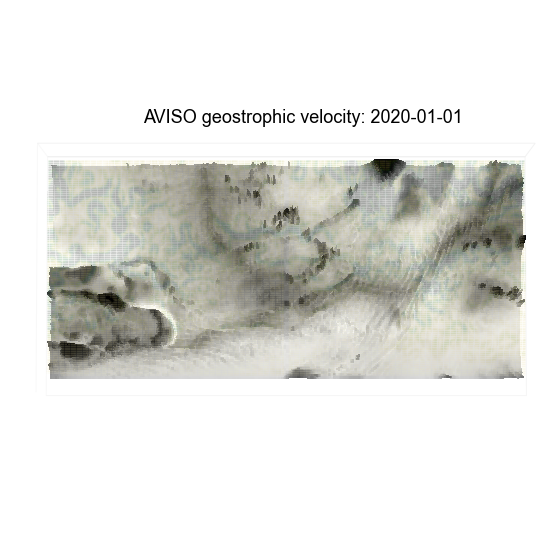

In [105]:
fig=plt.figure(figsize=[15,10])
ax = plt.axes(projection='3d')

ax.xaxis._axinfo["grid"].update({"linewidth":0})
ax.yaxis._axinfo["grid"].update({"linewidth":0})
ax.zaxis._axinfo["grid"].update({"linewidth":0})

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_box_aspect(aspect = (2,1,0.5))

ax.set_zlim(-8000, 0)
ax.set_xlim(-50, 50)

ax.zaxis.set_ticks([])
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

ax.text(-30, -30, 0, 'AVISO geostrophic velocity: '+str(ssa.isel(time=0).time.values)[:10])

ax.plot_surface(X, Y, Z, rcount=ssa.latitude.size, ccount=ssa.longitude.size,
                cmap='gray_r', zorder=0, vmin=-6000, vmax=0, antialiased=False)

ax.plot_surface(x, y, z, rcount=ssa.latitude.size, ccount=ssa.longitude.size,
                cmap=cmo.speed, zorder=1, vmin=0, vmax=0.5, antialiased=False, alpha=0.05)

angle=-90
ax.view_init(86, angle)